<h1> Numpy 와 선형회귀linear-gregression, 로지스틱회귀Logistic  </h1>

<h4> 라이브러리 설정</h4>

In [34]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [146]:
pip3 install Kaggler

SyntaxError: invalid syntax (<ipython-input-146-d69780ea8df4>, line 1)

In [35]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

In [36]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

<h4> 학습데이터 로드하기</h4>

In [39]:
#이것은 나의 디렉토리
data_dir = Path('./DACON')
trn_file = data_dir / 'train.csv'
seed = 42

<h4> train data 보기 (head) </h4>

In [44]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(320000, 19)


,u,g,r,i,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,nDetect,airmass_u,airmass_g,airmass_r,airmass_i,airmass_z,class
id,,,,,,,,,,,,,,,,,,,
0,23.2640,20.3368,19.0095,17.6724,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,18,18,1.1898,1.1907,1.1890,1.1894,1.1902,0
1,15.0521,14.0620,13.4524,13.2684,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,1,1,1.2533,1.2578,1.2488,1.2510,1.2555,1
2,16.7864,15.8254,15.5363,15.3935,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,2,2,1.0225,1.0241,1.0210,1.0217,1.0233,0
3,25.6606,21.1887,20.2212,19.8949,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,4,3,1.2054,1.2061,1.2049,1.2051,1.2057,0
4,24.4534,20.6992,19.0424,18.3242,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,13,12,1.1939,1.1943,1.1937,1.1938,1.1941,0


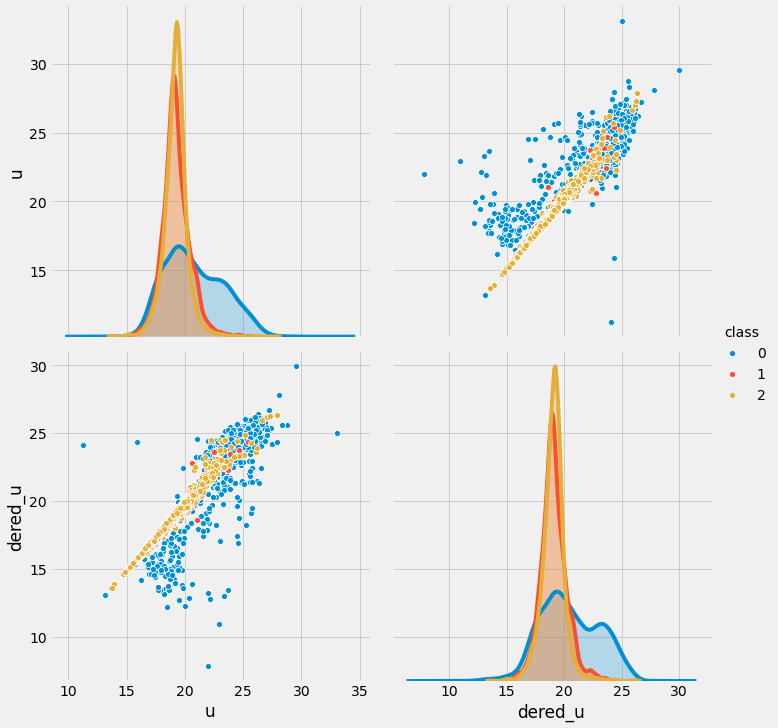

In [45]:
sns.pairplot(trn.sample(n=10000), vars=['u', 'dered_u'], hue='class', size=5)


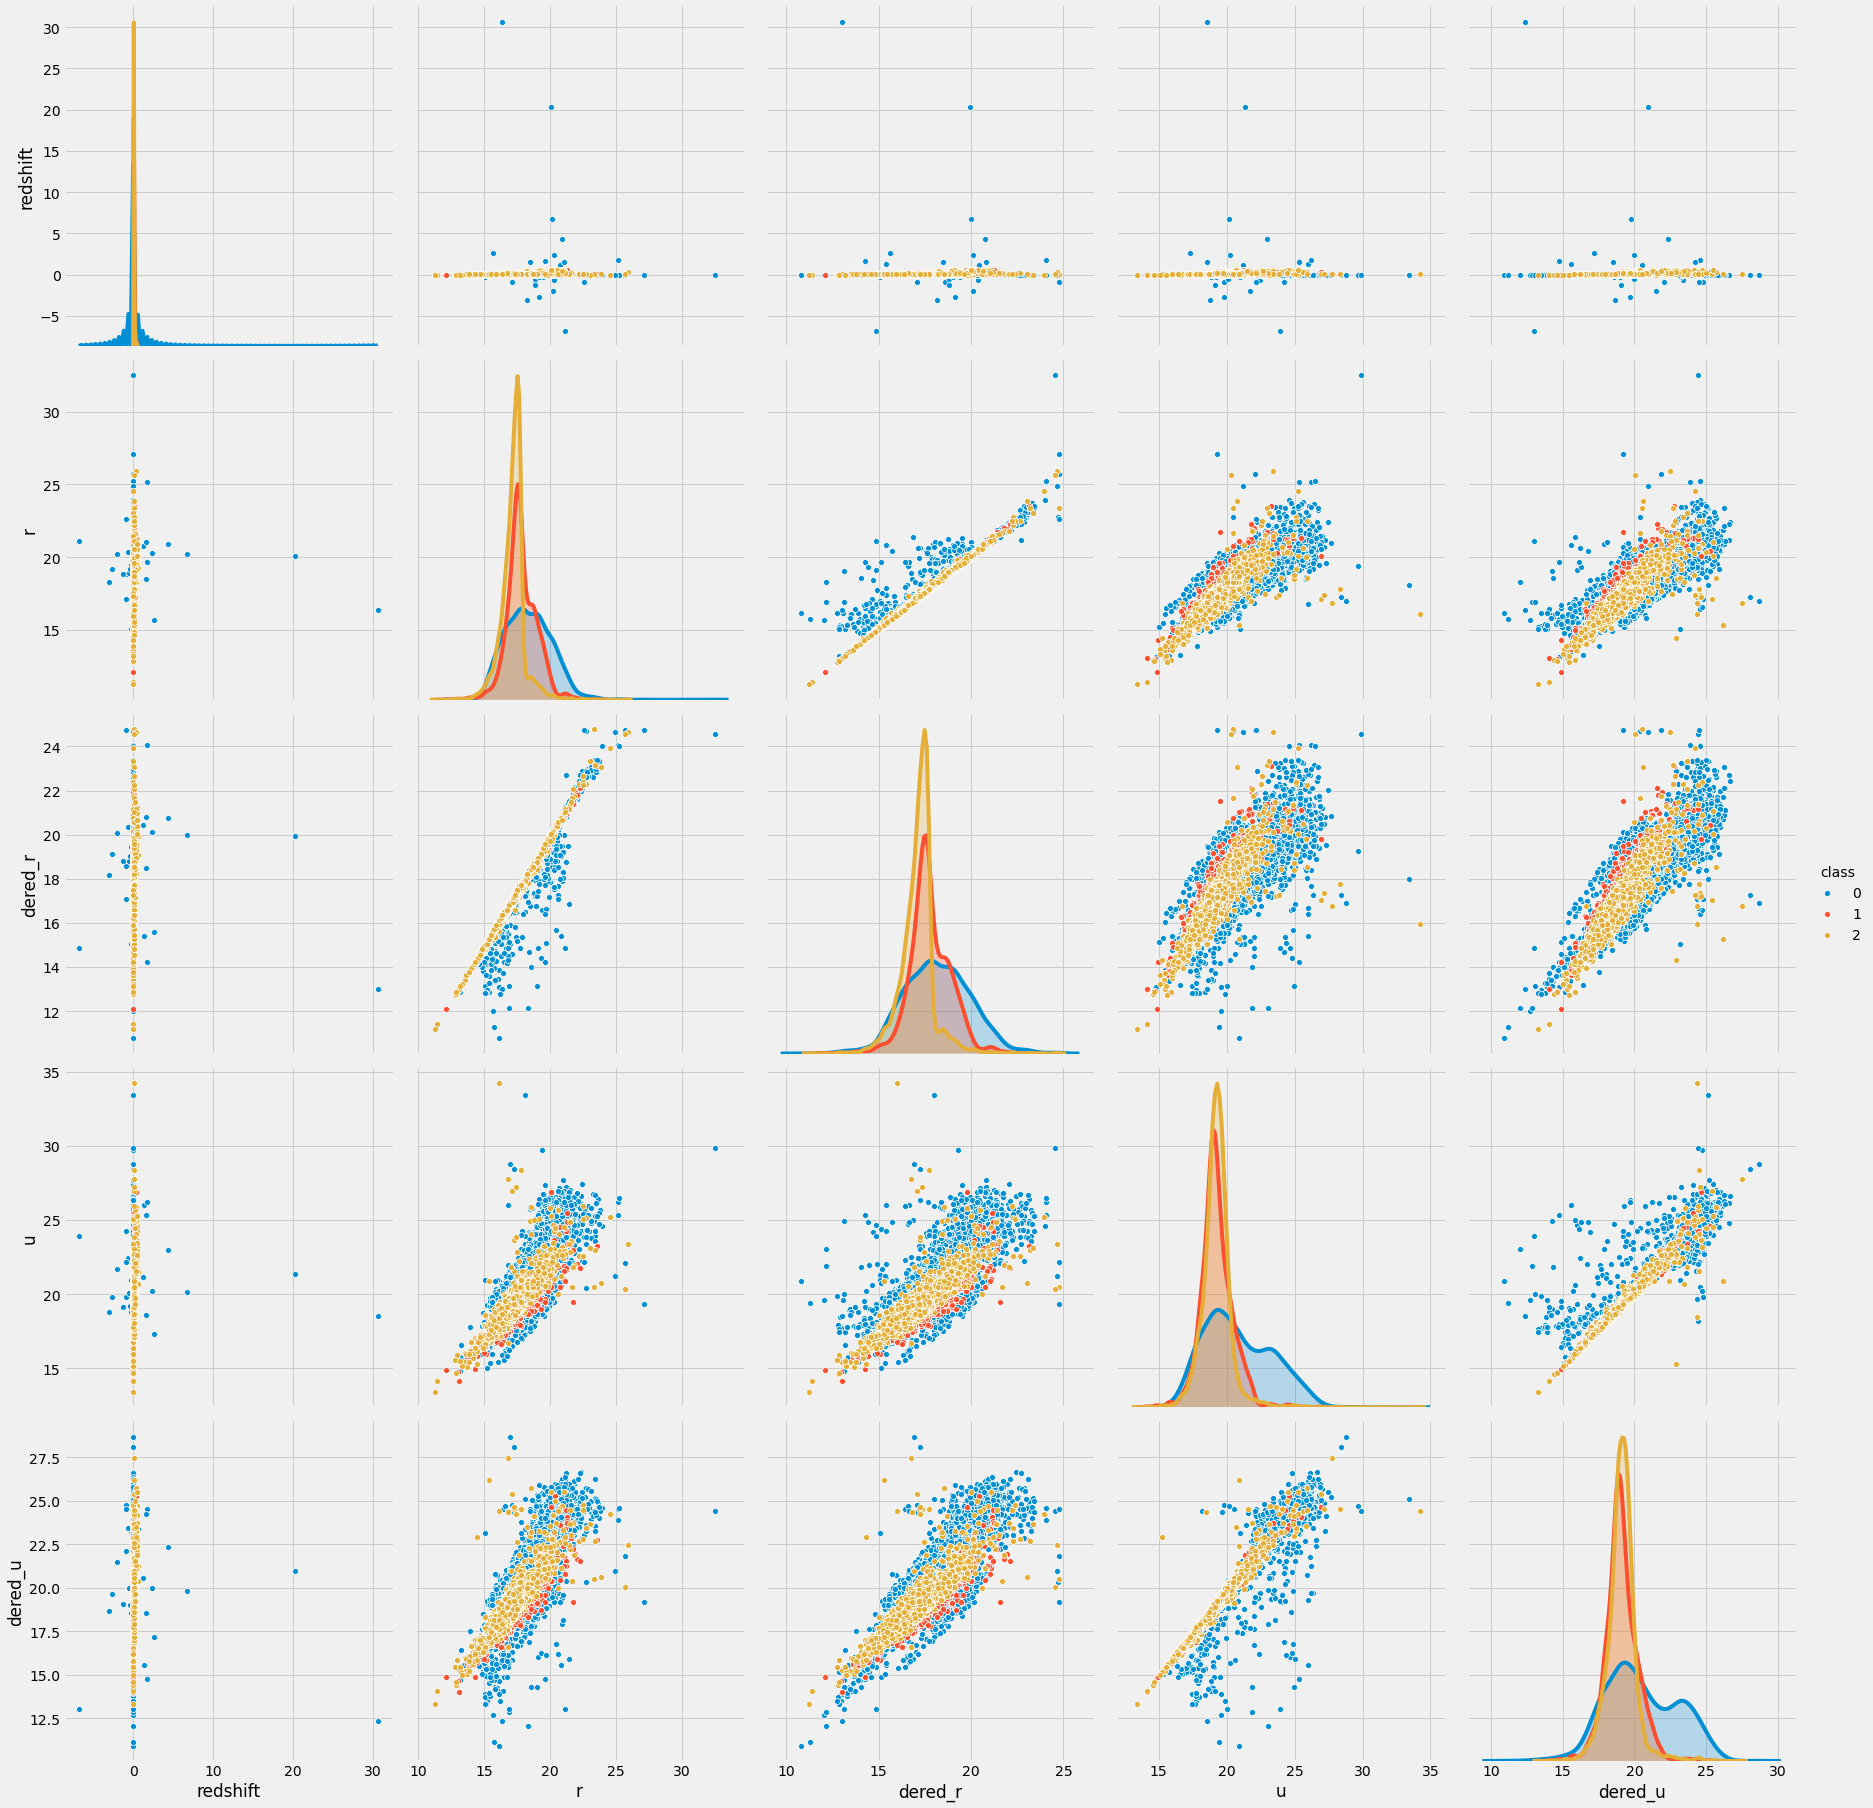

In [57]:
sns.pairplot(trn.sample(n=10000), vars=['redshift','r', 'dered_r','u', 'dered_u'], hue='class', size=5)


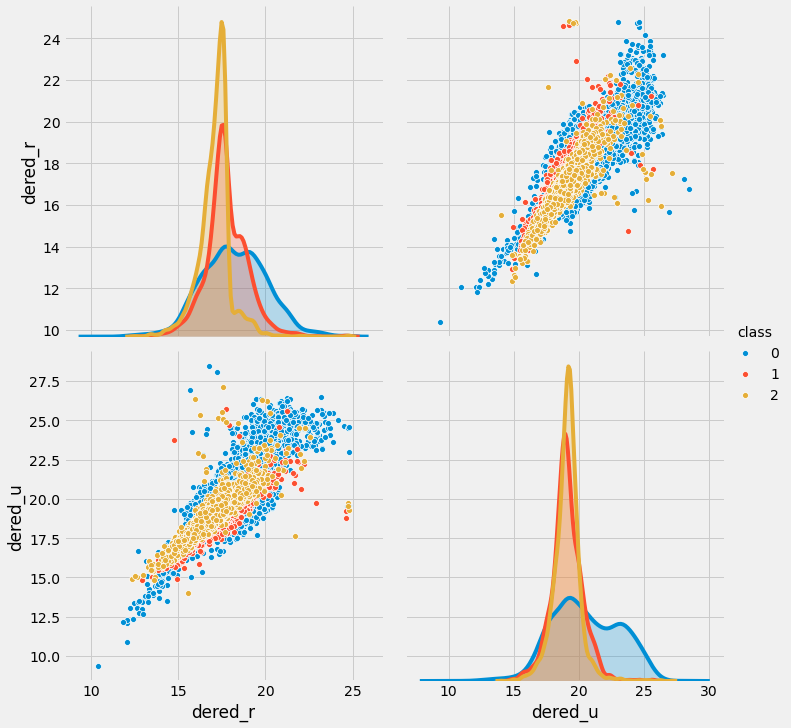

In [48]:
sns.pairplot(trn.sample(n=10000), vars=['dered_r','dered_u'], hue='class', size=5)


<h4> **두 개의 학습모델을 비교해 볼 예정<br>
Luu = [u,dered_u] , Lrr = [r,dered_r] </h4>

In [59]:
Xuu = trn[trn['class'] != 0][['u']].values
Yuu = trn[trn['class'] != 0]['dered_u'].values
print(Xuu.shape, Yuu.shape)
Xrr = trn[trn['class'] != 0][['r']].values
Yrr = trn[trn['class'] != 0]['dered_r'].values
print(Xrr.shape, Yrr.shape)

(200004, 1) (200004,)
(200004, 1) (200004,)


<h4> 이것은 u/dered_u,dered_r 을 볼 예정</h4>

In [75]:
Xudr = trn[trn['class'] != 0][['u']].values
Yudr = trn[trn['class'] != 0]['dered_r'].values
print(Xudr.shape, Yudr.shape)
Xdudr = trn[trn['class'] != 0][['dered_u']].values
Ydudr = trn[trn['class'] != 0]['dered_r'].values
print(Xdudr.shape, Ydudr.shape)

(200004, 1) (200004,)
(200004, 1) (200004,)


In [ ]:
<h3> RMSE 손실함수 정의 </h3>

In [76]:
rmse = lambda y, p: np.sqrt(np.mean((y - p) ** 2))
rmse3 = lambda y, p: np.sqrt(np.mean((y - p) ** 3)) # ^3 version

In [ ]:
<h3> NumPy 선형회귀 </h3>

In [132]:
alpha = .001
theta = [.1] *10
#epoch -= 0.2
epoch0 = 3.8

epoch = 3 #default

#epoch +=0.2
epoch2 = 4.2

In [87]:
theta

[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

In [133]:
# u,dered_u  r,dered_r
xuu = Xuu.flatten()
print(xuu.shape)
xrr = Xrr.flatten()
print(xrr.shape)

# u,dered_r  dered_u,dered_r
xudr = Xudr.flatten()
print(xudr.shape)
xdudr = Xdudr.flatten()
print(xdudr.shape)

(200004,)
(200004,)
(200004,)
(200004,)


<h5> 1. (u,dered_u) </h5>

In [134]:
# epoch default
# u,dered_u
rmses = []
rmses3 = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xuu, Yuu):
        p_i =  theta[0] + theta[1] * x_i
        theta[0] = theta[0] + alpha * (y_i - p_i)
        theta[1] = theta[1] + alpha * (y_i - p_i) * x_i
    rmses.append(rmse(Yuu, theta[0] + theta[1] * xuu))
    rmses3.append(rmse3(Yuu, theta[0] + theta[1] * xuu))

<h5> 2. (r,dered_r) </h5>

In [135]:
# epoch default
# r,dered_r
rmses_rr = []
rmses3_rr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xrr, Yrr):
        p_i =  theta[2] + theta[3] * x_i
        theta[2] = theta[2] + alpha * (y_i - p_i)
        theta[3] = theta[3] + alpha * (y_i - p_i) * x_i
    rmses_rr.append(rmse(Yrr, theta[2] + theta[3] * xrr))
    rmses3_rr.append(rmse3(Yrr, theta[2] + theta[3] * xrr))

<h5> 3. (u,dered_r) </h5>

In [136]:
# u,dered_r
rmses_udr = []
rmses3_udr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xudr, Yudr):
        p_i =  theta[4] + theta[5] * x_i
        theta[4] = theta[4] + alpha * (y_i - p_i)
        theta[5] = theta[5] + alpha * (y_i - p_i) * x_i
    rmses_udr.append(rmse(Yudr, theta[4] + theta[5] * xudr))
    rmses3_udr.append(rmse3(Yudr, theta[4] + theta[5] * xudr))

<h5> 4. (dered_u,dered_r) </h5>

In [137]:
# dered_u,dered_r
rmses_dudr = []
rmses3_dudr = []
for i in tqdm(range(epoch)):
    for x_i, y_i in zip(xdudr, Ydudr):
        p_i =  theta[6] + theta[7] * x_i
        theta[6] = theta[6] + alpha * (y_i - p_i)
        theta[7] = theta[7] + alpha * (y_i - p_i) * x_i
    rmses_dudr.append(rmse(Ydudr, theta[6] + theta[7] * xdudr))
    rmses3_dudr.append(rmse3(Ydudr, theta[6] + theta[7] * xdudr))

In [138]:
theta

[1.0399023588577836,
 0.9398022599435804,
 0.46868868679469644,
 0.9711903202505606,
 2.043848778599271,
 0.8215400700167133,
 1.2456954598870662,
 0.8688632839142713,
 0.1,
 0.1]

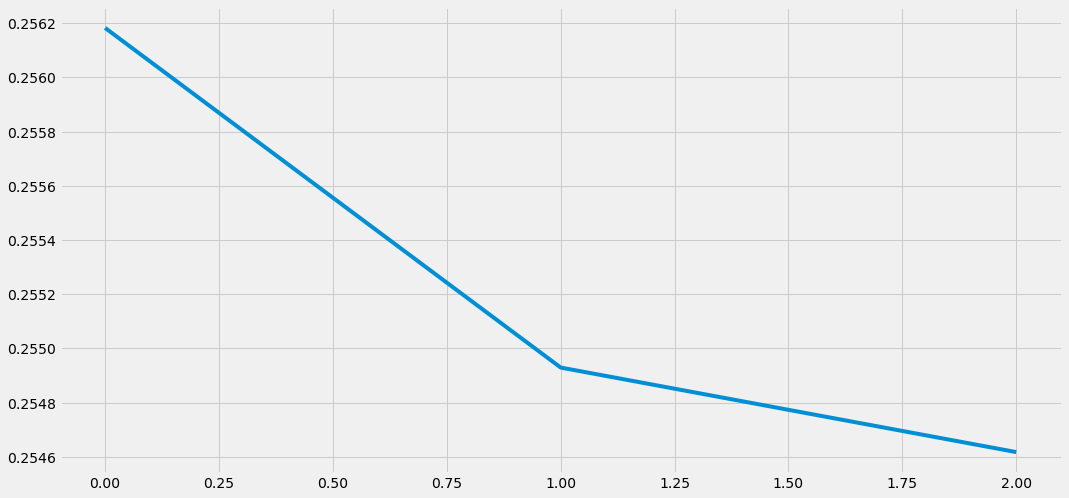

In [140]:
rmses
plt.plot(rmses)

In [143]:
print(rmses)
print(rmses_rr)
print(rmses_udr)
print(rmses_dudr)

[0.25618215910731906, 0.25492967552380746, 0.25461791287963526]
[0.17722623372983123, 0.17782429082699736, 0.17817927485069057]
[0.8465654452038702, 0.8448371329779669, 0.8444061162478157]
[0.8081519533482289, 0.8082041661154766, 0.8083995860943274]


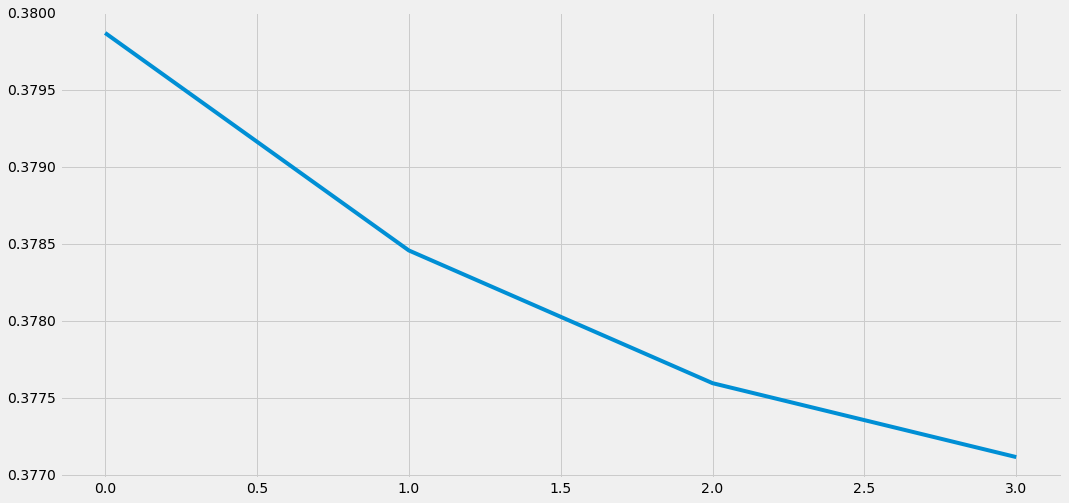

In [105]:
plt.plot(rmses3)

<h4> 4개의 인자를 학습한 시각화  </h4>

Text(0, 0.5, 'dered_u')

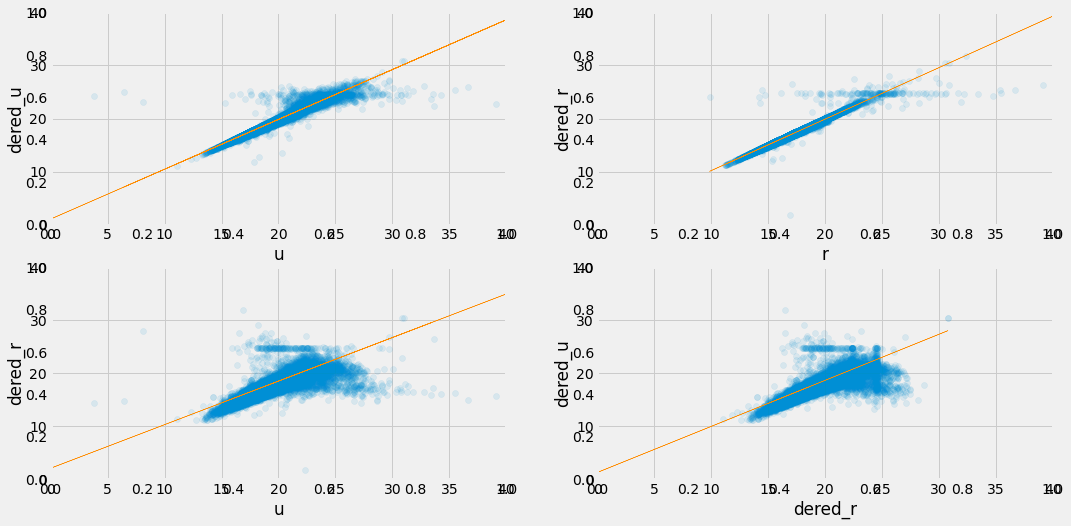

In [141]:
#시각화

fig, ax = plt.subplots(ncols=2, nrows =2)

ax[0][0] = fig.add_subplot(221)
ax[0][1] = fig.add_subplot(223)
ax[1][0] = fig.add_subplot(222)
ax[1][1] = fig.add_subplot(224)

ax[0][0].scatter(Xuu, Yuu, alpha=.1)
ax[0][0].plot(Xuu, theta[0] + theta[1] * xuu, color='darkorange', linewidth=.5)
ax[0][0].set_xlim([0, 40])
ax[0][0].set_ylim([0, 40])
ax[0][0].set_xlabel('u')
ax[0][0].set_ylabel('dered_u')

ax[0][1].scatter(Xudr, Yudr, alpha=.1)
ax[0][1].plot(Xudr, theta[4] + theta[5] * xudr, color='darkorange', linewidth=.5)
ax[0][1].set_xlim([0, 40])
ax[0][1].set_ylim([0, 40])
ax[0][1].set_xlabel('u')
ax[0][1].set_ylabel('dered_r')


ax[1][0].scatter(Xrr, Yrr, alpha=.1)
ax[1][0].plot(Xrr, theta[2] + theta[3] * xrr, color='darkorange', linewidth=.5)
ax[1][0].set_xlim([0, 40])
ax[1][0].set_ylim([0, 40])
ax[1][0].set_xlabel('r')
ax[1][0].set_ylabel('dered_r')

#ax[1][1].figure(figsize=(8, 8))
#ax[1][0].subplot(224)
ax[1][1].scatter(Xdudr, Ydudr, alpha=.1)
ax[1][1].plot(Xdudr, theta[6] + theta[7] * xdudr, color='darkorange', linewidth=.5)
ax[1][1].set_xlim([0, 40])
ax[1][1].set_ylim([0, 40])
ax[1][1].set_xlabel('dered_r')
ax[1][1].set_ylabel('dered_u')


<h3> Scikit-Learn을 이용한 로지스틱 회귀</h3>

In [147]:
X = trn[trn['class'] != 0].drop('class', axis=1)
y = trn[trn['class'] != 0]['class'].values - 1

In [148]:
np.unique(y)

array([0, 1], dtype=int64)

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, roc_auc_score

lr = LogisticRegression()
lr.fit(X, y)
p = lr.predict_proba(X)[:, 1]

In [150]:
lr.coef_, lr.intercept_


(array([[ 0.81616212,  0.08464392, -1.87162654,  0.51454701, -0.54830475,
         -1.58484209,  2.2604413 , -0.0546294 , -1.36195321,  0.57621235,
         -0.60078908,  0.08330602, -0.10049235, -0.14093052, -0.14356047,
         -0.13844518, -0.13967095, -0.14222821]]),
 array([0.22171237]))

In [151]:
log_loss(y, p)


0.3656283635165419

In [152]:
roc_auc_score(y, p)


0.8761097334943841

In [159]:
from kaggler.metrics import plot_roc_curve, plot_pr_curve

In [157]:
!pip3 install -U kaggler

  Using cached Kaggler-0.8.11.tar.gz (885 kB)


  Created wheel for kaggler: filename=Kaggler-0.8.11-cp38-cp38-win_amd64.whl size=547921 sha256=cf1e22e4cfb8a60e80acc3d34233ab327f0c99d25d3a81b296b0a270e2acf7d2
  Stored in directory: c:\users\inhoinno\appdata\local\pip\cache\wheels\e8\a9\c8\19d7d2edfa1a74d1ae25c81c2746d02bc7f00343c8f004828f
Successfully built kaggler


Text(0.5, 1.0, 'Precision-Recall Curve')

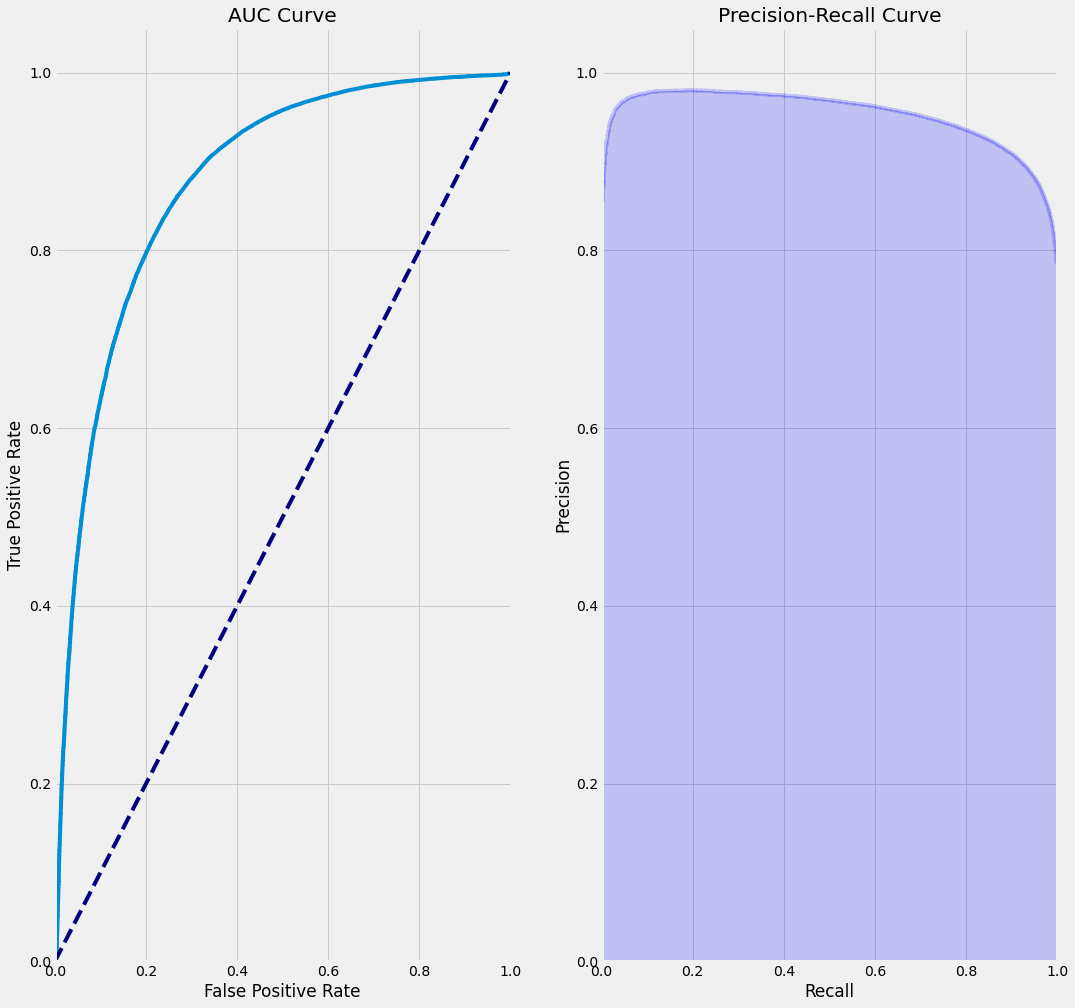

In [160]:
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plot_roc_curve(y, p);
plt.title('AUC Curve')
plt.subplot(1, 2, 2)
plot_pr_curve(y, p);
plt.title('Precision-Recall Curve')